# Actividad 1 - Aprendizaje estadístico-automático


**Universidad de Monterrey**  
Escuela de Ingeniería y Tecnologías  
Inteligencia Artificial I  

**Estudiante:** Anna Carolina de Azevedo Leite  
**Docente:** Antonio Martínez Torteya  
**Fecha:** 19 de Enero de 2026  



## 1. Exploración y contextualización de los datos  
Analizando inicialmente, el archivo contiene información de 2111 individuos provenientes de 
Colombia, Perú y México. El conjunto de datos incluye variables demográficas, de hábitos y 
de salud, así como una variable categórica que describe el nivel de obesidad de cada 
individuo, calculado a partir del índice de masa corporal (información retirada del PDF 
informativo).



### Variables analizadas
- Edad  
- Estatura  
- Peso  
- ConsumoDeAgua  
- Sexo  
- FamiliarConSobrepeso  
- ComeMuchasCalorias  
- ComeVegetales  
- Fumador  
- NivelDeObesidad  


### Estadísticos descriptivos aproximados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('A1.1 Obesidad.csv')

print("="*60)
print("ANÁLISE EXPLORATÓRIA - DADOS DE OBESIDADE")
print("="*60)
print(f"\nTotal de indivíduos: {len(df)}")
print(f"\nVariáveis no dataset: {list(df.columns)}")

print("\n" + "-"*60)
print("ESTATÍSTICAS DESCRITIVAS")
print("-"*60)
print(df[['Edad', 'Estatura', 'Peso']].describe())

ANÁLISE EXPLORATÓRIA - DADOS DE OBESIDADE

Total de indivíduos: 2111

Variáveis no dataset: ['Sexo', 'Edad', 'Estatura', 'Peso', 'FamiliarConSobrepeso', 'ComeMuchasCalorias', 'ComeVegetales', 'Fumador', 'ConsumoDeAgua', 'NivelDeObesidad']

------------------------------------------------------------
ESTATÍSTICAS DESCRITIVAS
------------------------------------------------------------
              Edad     Estatura         Peso
count  2111.000000  2111.000000  2111.000000
mean     24.312600     1.701677    86.586058
std       6.345968     0.093305    26.191172
min      14.000000     1.450000    39.000000
25%      19.947192     1.630000    65.473343
50%      22.777890     1.700499    83.000000
75%      26.000000     1.768464   107.430682
max      61.000000     1.980000   173.000000



## 2. Reflexión sobre el diseño del estudio

Se propone agregar dos variables adicionales:

- **Actividad física**
- **Condición metabólica**

**Motivo:** influyen en el metabolismo basal, la distribución de  grasa y el riesgo hereditario, además de modificar el balance energético. 
Ambas variables propuestas son de naturaleza cualitativa, con el objetivo de identificar si la  persona realiza alguna actividad física o presenta alguna condición metabólica como diabetes, hipertensión, entre otras.


In [3]:
print("\n" + "="*60)
print("DISTRIBUIÇÃO POR SEXO")
print("="*60)
sexo_counts = df['Sexo'].value_counts()
print(sexo_counts)
print(f"\nPercentual:")
print(f"  Mulheres: {sexo_counts['Female']/len(df)*100:.1f}%")
print(f"  Homens: {sexo_counts['Male']/len(df)*100:.1f}%")

print("\n" + "="*60)
print("DISTRIBUIÇÃO POR NÍVEL DE OBESIDADE")
print("="*60)
print(df['NivelDeObesidad'].value_counts())


DISTRIBUIÇÃO POR SEXO
Sexo
Male      1068
Female    1043
Name: count, dtype: int64

Percentual:
  Mulheres: 49.4%
  Homens: 50.6%

DISTRIBUIÇÃO POR NÍVEL DE OBESIDADE
NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



## 3. Variable de interés para inferencia

**Variable de salida:** NivelDeObesidad  

- Tipo: Cualitativa ordinal  
- Importancia: Permite identificar gravedad del problema, población en riesgo y factores asociados.



### justificación:
El nivel de obesidad es importante en la investigación porque muestra dónde el problema es más grave, quién está más en riesgo y qué factores pueden estar causándolo. Con este dato, es posible comparar ciudades o países, observar si la situación empeora con el tiempo y relacionarlo con aspectos como alimentación, ingresos, educación y políticas de salud. sí, podemos entender mejor por qué aparece la obesidad y cómo puede prevenirse. 


### Análisis Descriptivo: 
La variable es cualitativa ordinal (ya que los niveles siguen 
una jerarquía, desde Bajo Peso hasta Obesidad Tipo III). 

In [4]:
print("\n" + "="*60)
print("DISTRIBUIÇÃO POR SEXO")
print("="*60)
sexo_counts = df['Sexo'].value_counts()
print(sexo_counts)
print(f"\nPercentual:")
print(f"  Mulheres: {sexo_counts['Female']/len(df)*100:.1f}%")
print(f"  Homens: {sexo_counts['Male']/len(df)*100:.1f}%")

print("\n" + "="*60)
print("DISTRIBUIÇÃO POR NÍVEL DE OBESIDADE")
print("="*60)
print(df['NivelDeObesidad'].value_counts())


DISTRIBUIÇÃO POR SEXO
Sexo
Male      1068
Female    1043
Name: count, dtype: int64

Percentual:
  Mulheres: 49.4%
  Homens: 50.6%

DISTRIBUIÇÃO POR NÍVEL DE OBESIDADE
NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


**Distribución:** 
Las categorías más frecuentes son **Obesity_Type_I** (351 individuos) y **Obesity_Type_III** (324 individuos), seguidas por Obesity_Type_II (297), Overweight_Level_I (290), Overweight_Level_II (290) y Normal_Weight (287). Se observa también una presencia de Insufficient_Weight (272 casos).

El conjunto de datos está compuesto por **2.111 individuos**, siendo:
- **Hombres:** 1.068 (50.6%)
- **Mujeres:** 1.043 (49.4%)


## 4. Análisis gráfico enfocado en una subpoblación

**Subpoblación:** Mujeres  

Se analiza la relación entre:
- Peso (variable cuantitativa)
- Nivel de Obesidad (variable de salida)

**Justificación:**
- **1. Motivo:** Las mujeres presentan, en general, índices de obesidad ligeramente mayores que los hombrs
- **2. Tendencia**: A medida que el peso aumenta, el índice de obesidad también incrementa. 
- **3. Patrón:** El grupo de mujeres categorizadas como  Obesidad_Tipo_III muestra una dispersión amplia de valores. 
- **4. Dispersión:** Se puede observar que en las categorías Normal_Weight y Overweight algunos pesos se parecen y están un poco mezclados. Esto demuestra que la estatura influye bastante para determinar la categoría final, principalmente en los  niveles más bajos. 


**Conclusiones:**
- El aumento del peso incrementa el nivel de obesidad.
- Existe dispersión amplia en Obesity_Type_III.
- En Normal_Weight y Overweight hay superposición debido a la influencia de la estatura.


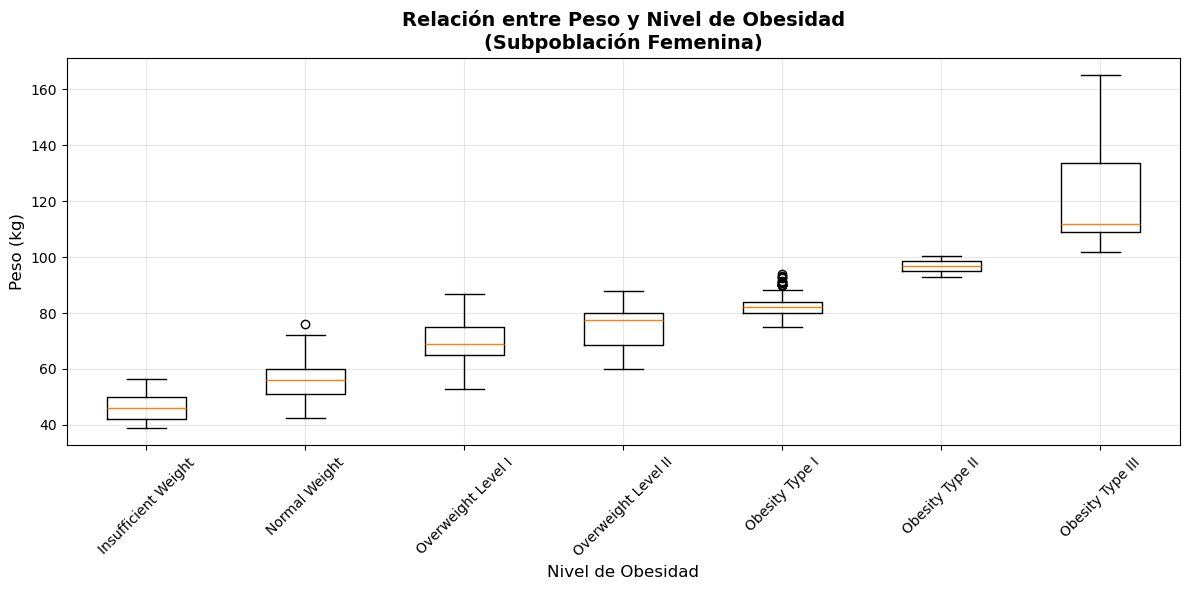

In [6]:
df_female = df[df['Sexo'] == 'Female']

# Ordem das categorias (para o gráfico ficar organizado)
categorias_ordem = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
                    'Obesity_Type_III']

plt.figure(figsize=(12, 6))

# Criar boxplot para cada categoria
data_to_plot = [df_female[df_female['NivelDeObesidad'] == cat]['Peso'].values 
                for cat in categorias_ordem if cat in df_female['NivelDeObesidad'].unique()]

plt.boxplot(data_to_plot, labels=[cat.replace('_', ' ') for cat in categorias_ordem 
                                   if cat in df_female['NivelDeObesidad'].unique()])

plt.title('Relación entre Peso y Nivel de Obesidad\n(Subpoblación Femenina)', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Obesidad', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('grafico_obesidad_femenina.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
print("\n" + "="*60)
print("TABLA DE ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

stats = df[['Edad', 'Estatura', 'Peso']].agg(['min', 'mean', 'max']).round(2)
print(stats)

print("\n" + "-"*60)
print("VALORES PARA LA TABLA DEL INFORME:")
print("-"*60)
print(f"Edad: Mín={stats.loc['min', 'Edad']}, Media={stats.loc['mean', 'Edad']}, Máx={stats.loc['max', 'Edad']}")
print(f"Estatura: Mín={stats.loc['min', 'Estatura']}, Media={stats.loc['mean', 'Estatura']}, Máx={stats.loc['max', 'Estatura']}")
print(f"Peso: Mín={stats.loc['min', 'Peso']}, Media={stats.loc['mean', 'Peso']}, Máx={stats.loc['max', 'Peso']}")


TABLA DE ESTADÍSTICAS DESCRIPTIVAS
       Edad  Estatura    Peso
min   14.00      1.45   39.00
mean  24.31      1.70   86.59
max   61.00      1.98  173.00

------------------------------------------------------------
VALORES PARA LA TABLA DEL INFORME:
------------------------------------------------------------
Edad: Mín=14.0, Media=24.31, Máx=61.0
Estatura: Mín=1.45, Media=1.7, Máx=1.98
Peso: Mín=39.0, Media=86.59, Máx=173.0
